<a href="https://colab.research.google.com/github/DimaKav/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
# Load data into pandas dataframe

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')

# Check that it has 3 attributes and 306 instances

print(df.shape)

# Check missing values

print(df.isnull().sum())

# Change the column names

df.columns = ['patient_age', 'year_of_op', 'num_cancer_nodes', 'survival']

# Encode 0 for not surviving and 1 for surviving

df.survival.replace(2, 0, inplace=True)

# Check first ten rows

print(df.head(10))

(305, 4)
30     0
64     0
1      0
1.1    0
dtype: int64
   patient_age  year_of_op  num_cancer_nodes  survival
0           30          62                 3         1
1           30          65                 0         1
2           31          59                 2         1
3           31          65                 4         1
4           33          58                10         1
5           33          60                 0         1
6           34          59                 0         0
7           34          66                 9         0
8           34          58                30         1
9           34          60                 1         1



## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [32]:
# Table 1: summary statistics

print(df.describe())
print(df.corr())

       patient_age  year_of_op  num_cancer_nodes    survival
count   305.000000  305.000000        305.000000  305.000000
mean     52.531148   62.849180          4.036066    0.734426
std      10.744024    3.254078          7.199370    0.442364
min      30.000000   58.000000          0.000000    0.000000
25%      44.000000   60.000000          0.000000    0.000000
50%      52.000000   63.000000          1.000000    1.000000
75%      61.000000   66.000000          4.000000    1.000000
max      83.000000   69.000000         52.000000    1.000000
                  patient_age  year_of_op  num_cancer_nodes  survival
patient_age          1.000000    0.092623         -0.066548 -0.064351
year_of_op           0.092623    1.000000         -0.003277  0.004076
num_cancer_nodes    -0.066548   -0.003277          1.000000 -0.286191
survival            -0.064351    0.004076         -0.286191  1.000000


In [120]:
# Table 2: cross tabulation of total survival by num cancer nodes

print(pd.crosstab(df.num_cancer_nodes, df.survival, margins=True, margins_name="Total"))

survival           0    1  Total
num_cancer_nodes                
0                 19  117    136
1                  8   32     40
2                  5   15     20
3                  7   13     20
4                  3   10     13
5                  4    2      6
6                  3    4      7
7                  2    5      7
8                  2    5      7
9                  4    2      6
10                 1    2      3
11                 3    1      4
12                 1    1      2
13                 4    1      5
14                 1    3      4
15                 2    1      3
16                 0    1      1
17                 1    0      1
18                 0    1      1
19                 2    1      3
20                 1    1      2
21                 1    0      1
22                 1    2      3
23                 3    0      3
24                 1    0      1
25                 0    1      1
28                 0    1      1
30                 0    1      1
35        

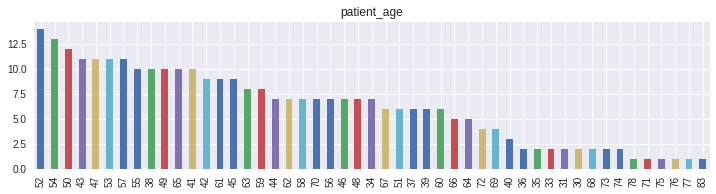

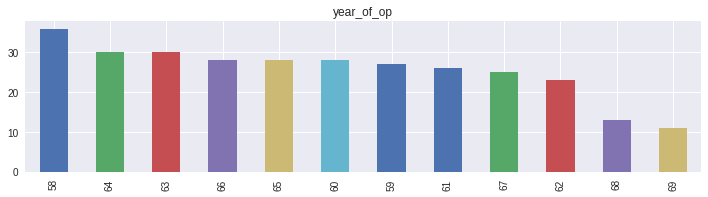

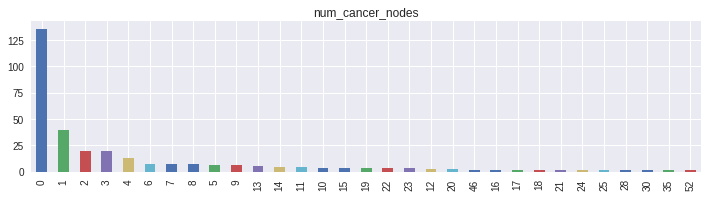

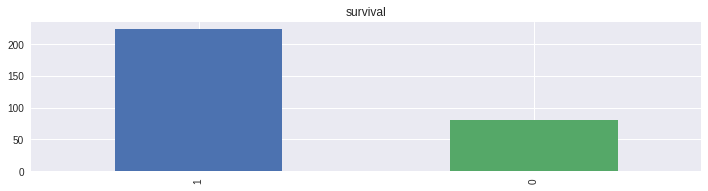

In [97]:
# Plot 1: distributions of variables

col_list = ['patient_age', 'year_of_op', 'num_cancer_nodes', 'survival']

for i, col in zip(range(1,5), col_list):
  plt.figure(figsize=(10, 10))
  plt.subplot(4,1,i)
  pd.value_counts(df[col]).plot.bar()
  plt.title(col)
  plt.tight_layout()

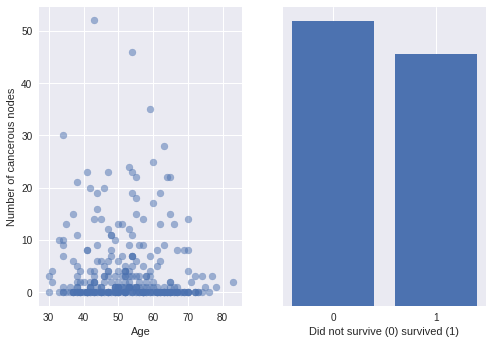

In [117]:
# Plot 2: correlations between number of cancerous nodes, age, and survival

plt.subplot(1,2,1)
_ = plt.scatter(df.patient_age, df.num_cancer_nodes, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Number of cancerous nodes')
plt.subplot(1,2,2)
_ = plt.bar(df.survival, df.num_cancer_nodes)
plt.xticks([0,1])
plt.xlabel('Did not survive (0) survived (1)')
plt.yticks([])
plt.show()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

Having less cacerous nodes. Also, younger patients tended to survive a little more.

- What is at least one feature that looks to have a negative relationship with survival?

Increasing number of cancerous nodes.

- How are those two features related with each other, and what might that mean?

Patient age and survival are related to each other because younger patients survived a little more than older patients.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

In [226]:
# Younger patients survived a little more than older patients
# This is also shown in the correlations above

time_bins = pd.cut(df['patient_age'], 5) 
grouped_s = pd.crosstab(df['survival'], time_bins)

grouped_s

patient_age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
survival,,,,,
0,4,31,27,16,3
1,38,68,69,43,6
